# Machine Exercise 6
### Prepared by: CAYAS, Ryan Roi [2022-22085]

## Prerequisites

We first import the required packages and load the necessary files.

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import KernelDensity, LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.impute import SimpleImputer

In [20]:
import random
random.seed(0)

## Part 1: Trip Advisor Travel Reviews

In [249]:
## We load the data
tripadvisor_df = pd.read_csv('tripadvisor_review.csv', sep=',')
X = tripadvisor_df.iloc[:,1:]
X

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [24]:
X.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


### 1a. k-Means on Entire Dataset

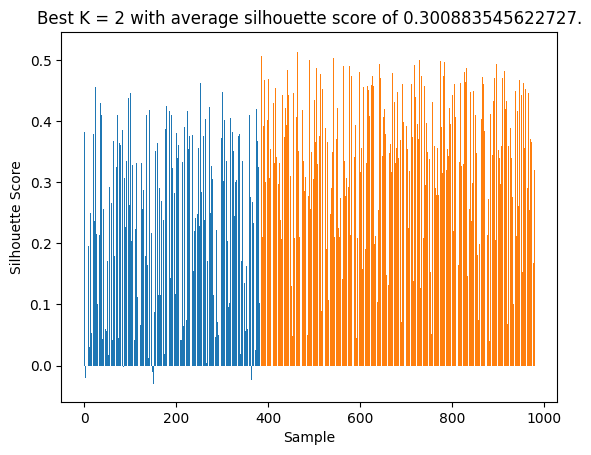

In [36]:
best_silhouette = 0
best_K = 0

for K in range(2,20):
    kmeans = KMeans(n_clusters=K, init='k-means++', n_init = 10, random_state = 0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg > best_silhouette:
        best_K = K
        best_silhouette = silhouette_avg

K = best_K


kmeans_best = KMeans(n_clusters = K, n_init = 10)
kmeans_best.fit(X)
cluster_labels = kmeans_best.labels_
silhouette_values = silhouette_samples(X, cluster_labels)

sample = 0
for i in range(0,K):
    sil = silhouette_values[cluster_labels == i]
    plt.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
#plt.axis([0, 979, -0.1, 1])
plt.xlabel('Sample')
plt.ylabel('Silhouette Score')
plt.title(f"Best K = {best_K} with average silhouette score of {best_silhouette}.")
plt.show()

### 1b. PCA + k-Means

In [250]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

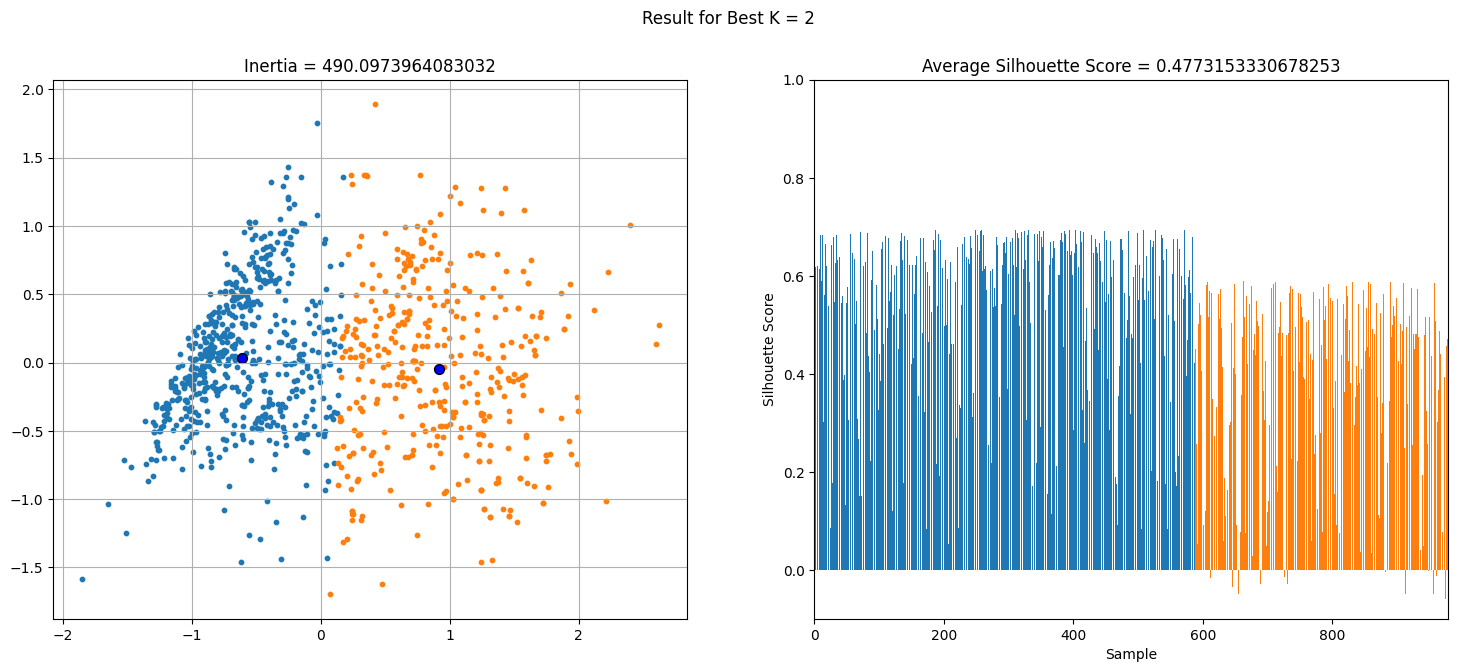

In [49]:
best_silhouette2 = 0
best_K = 0

for K in range(2,20):
    kmeans2 = KMeans(n_clusters=K, init='k-means++', n_init = 10, random_state = 0)
    kmeans2.fit(X_pca)
    cluster_labels = kmeans2.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    if silhouette_avg > best_silhouette2:
        best_K = K
        best_silhouette2 = silhouette_avg

kmeans_best2 = KMeans(n_clusters=best_K, init='k-means++', n_init = 10, random_state = 0)
kmeans_best2.fit(X_pca)
cluster_labels = kmeans_best2.labels_
centroids = kmeans_best2.cluster_centers_
inertia = kmeans_best2.inertia_
silhouette_values = silhouette_samples(X_pca, cluster_labels)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
fig.suptitle(f"Result for Best K = {best_K}")
for i in range(0,K):
    ax1.scatter(X_pca[cluster_labels == i,0], X_pca[cluster_labels == i,1], s=10)
ax1.scatter(centroids[:,0],centroids[:,1], s=50, color='b', edgecolor='k')
ax1.set_title(f"Inertia = {inertia}")
ax1.grid()
sample = 0
for i in range(0,K):
    sil = silhouette_values[cluster_labels == i]
    ax2.bar(np.arange(sample,sample + sil.size),sil)
    sample = sample + sil.size
ax2.axis([0, 979, -0.1, 1])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Average Silhouette Score = {best_silhouette2}")
plt.show()

### 1c. KDE for Outlier Detection

Threshold (KDE) = 0.036312713902802975


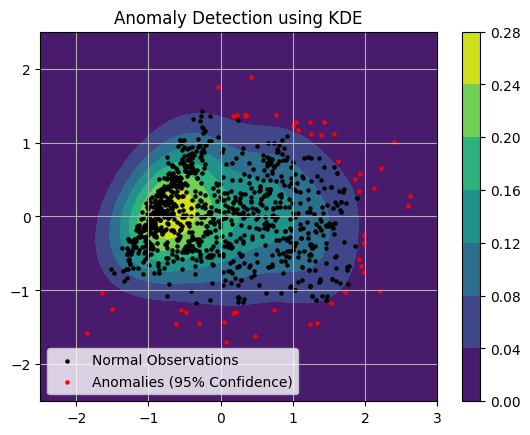

In [251]:
# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-2.5,3),np.linspace(-2.5,2.5))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(X_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = X_pca[scores > threshold,:]
anomals = X_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

## Part 2: Wastewater Treatment Plant

In [79]:
wastewater_df =  pd.read_csv('water+treatment+plant/water-treatment.data', sep=",", header=None)
wastewater_df.replace('?', np.nan, inplace=True)
wastewater_df.drop(wastewater_df.columns[0], axis = 1, inplace=True)
wastewater_df

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,7.9,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,7.7,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,7.7,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [80]:
wastewater_df.isnull().sum()

1     18
2      3
3      0
4     23
5      6
6      1
7     11
8     25
9      0
10     0
11    40
12     0
13    11
14    24
15     0
16     0
17    28
18     9
19     2
20    13
21    25
22     0
23     1
24    23
25    18
26     5
27    17
28    28
29     1
30    62
31     4
32    27
33    40
34    26
35    36
36    25
37     8
38    31
dtype: int64

In [81]:
wastewater_df.describe()

,3,9,10,12,15,16,22
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


In [89]:
# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(wastewater_df), columns=wastewater_df.columns)

# Perform standard scaler
X = StandardScaler().fit_transform(df_imputed)

In [99]:
X_describe = pd.DataFrame(X)
X_describe.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,...,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000,527.00000
mean,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,...,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,...,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095,1.00095
min,-4.17121,-0.82476,-3.70030,-2.60112,-2.72579,-0.95403,-3.92674,-1.56755,-2.09777,-2.33771,...,-2.09680,-2.77263,-4.17675,-9.51919,-8.89999,-5.86928,-10.24335,-6.76789,-9.65064,-14.51164
25%,-0.65424,-0.53269,-0.85409,-0.67149,-0.67245,-0.42338,-0.45166,-0.52098,-0.70369,-0.57334,...,-0.67107,-0.57172,-0.62148,-0.19005,-0.19492,-0.39036,-0.17910,-0.41613,-0.15500,0.02632
50%,-0.15526,-0.31364,-0.04089,-0.06126,-0.05770,-0.23175,0.21240,-0.03507,-0.18407,-0.13224,...,-0.15967,0.00000,0.06132,0.31547,0.18356,0.13102,0.13080,0.09732,0.21305,0.14207
75%,0.59359,0.23400,0.77231,0.54897,0.56542,0.10727,0.66868,0.33871,0.49016,0.74994,...,0.50800,0.61699,0.64994,0.59121,0.50290,0.63473,0.48497,0.61653,0.49522,0.21152
max,3.50782,11.36923,3.61852,4.11138,4.46719,13.12296,1.92346,11.73886,4.43923,2.95541,...,6.34137,2.88274,2.94948,1.08524,1.33083,2.56119,1.17854,2.33572,1.28039,0.21152


### 2a. Outlier Deteection using DBSCAN

In [211]:
eps = 5
min_samples = 4

dbscan = DBSCAN(eps = eps, min_samples = min_samples)
dbscan.fit(X)
cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Number of noise points
n_noise_ = list(cluster_labels).count(-1)

# Print results
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 63


In [212]:
# Get unique values and their counts
unique_values, counts = np.unique(cluster_labels, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

-1: 63
0: 464


In [213]:
# Get the indices of points with cluster_labels equal to -1
noise_indices = np.where(cluster_labels == -1)[0]

# Print the indices
print("Indices of points with cluster label -1:\n", noise_indices)


Indices of points with cluster label -1:
 [ 10  11  12  13  36  58  72  78  81  83  84  96 105 111 112 115 147 148
 164 169 170 179 186 187 194 198 201 208 209 215 226 232 233 240 261 277
 292 293 330 332 337 342 361 362 369 372 374 381 382 395 398 400 401 402
 422 426 431 433 434 441 442 443 521]


### 2b. PCA + Outlier Detection

In [214]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Threshold (KDE) = 0.002466830991361213


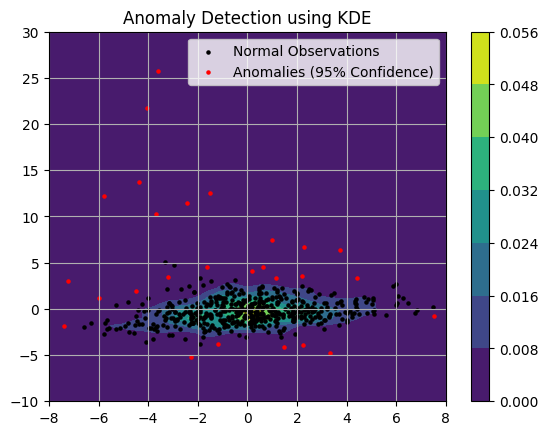

In [217]:
# Make a meshgrid for plotting surfaces
Xp, Yp = np.meshgrid(np.linspace(-8,8),np.linspace(-10,30))
XY = np.vstack([Xp.ravel(), Yp.ravel()]).T

# Generate the KDE surface as Z
kde = KernelDensity(kernel='gaussian',bandwidth=0.4).fit(X_pca)
Zp = np.exp(kde.score_samples(XY))
Zp = Zp.reshape(Xp.shape)

# Establish a confidence level of 95% (or 5% cutoff) 
# for the UCL using the quantile of kde_scores.
scores = kde.score_samples(X_pca)
threshold = np.quantile(scores,0.05)
print(f"Threshold (KDE) = {np.exp(threshold)}")

# Get the anomalous data points
normals = X_pca[scores > threshold,:]
anomals = X_pca[scores <= threshold,:]

cntr = plt.contourf(Xp, Yp, Zp, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (95% Confidence)')
plt.title('Anomaly Detection using KDE')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

In [221]:
indices = np.where(scores <= threshold)[0]
print(f'Number of outliers: {len(indices)}')
print(f'Indices of outliers: \n{indices}')

Number of outliers: 27
Indices of outliers: 
[ 10  11  12  13  18  30  36  78  81  96 124 140 146 147 148 208 226 292
 319 361 382 395 398 441 442 443 521]


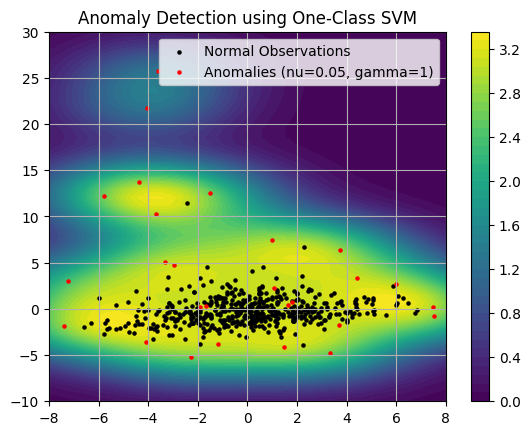

In [245]:
ocsvm = OneClassSVM(nu=0.05, gamma='scale').fit(X_pca)
Zp = ocsvm.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = ocsvm.predict(X_pca)
normals = X_pca[y_pred == 1,:]
anomals = X_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=50, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (nu=0.05, gamma=1)')
plt.title('Anomaly Detection using One-Class SVM')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

In [246]:
indices = np.where(y_pred == -1)[0]
print(f'Number of outliers: {len(indices)}')
print(f'Indices of outliers: \n{indices}')

Number of outliers: 27
Indices of outliers: 
[  0  10  11  12  36  87  96 102 104 132 147 148 179 204 208 226 261 274
 292 316 361 382 395 398 422 441 443]


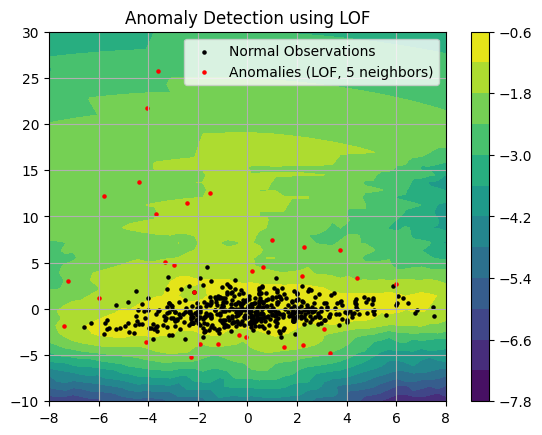

In [247]:
lof = LocalOutlierFactor(n_neighbors=10, novelty=True).fit(X_pca)
Zp = lof.score_samples(XY)
Zp = Zp.reshape(Xp.shape)

# Get the anomalous data points
y_pred = lof.predict(X_pca)
normals = X_pca[y_pred == 1,:]
anomals = X_pca[y_pred == -1,:]

cntr = plt.contourf(Xp, Yp, Zp, levels=10, cmap='viridis')
plt.scatter(normals[:,0], normals[:,1], s=5, color='k', label='Normal Observations')
plt.scatter(anomals[:,0], anomals[:,1], s=5, color='r', label='Anomalies (LOF, 5 neighbors)')
plt.title('Anomaly Detection using LOF')
plt.colorbar(cntr)
plt.legend()
plt.grid()
plt.show()

In [248]:
indices = np.where(y_pred == -1)[0]
print(f'Number of outliers: {len(indices)}')
print(f'Indices of outliers: \n{indices}')

Number of outliers: 31
Indices of outliers: 
[ 10  11  12  13  14  18  30  36  78  96 104 125 146 147 148 179 186 187
 204 208 261 292 294 319 361 382 395 398 441 442 443]


All three methods identified almost the same number of outliers with several points identified in all three. The One-Class SVM identified some points that are evidently close to other points as outliers while the other two methods reasonably identified the outliers to be the points that are far/outside the clustered region of points. Moreover, the contour plot that the KDE method generated seems to be more representative of the actual cluster of points than that of the LOF.

Overall, based on inspection, the KDE identified the reasonable set of outliers while having a contour plot that best represents the underlying distribution of the observerd data.